In [50]:
import skimage.restoration as sr
import numpy as np
import dicom
import glob
import h5py
import os
import scipy.io as scio
from skimage import exposure
from skimage.io import imsave, imread
from scipy.misc import imresize
from medpy.filter.noise import immerkaer
from scipy.io import savemat
from scipy import ndimage, misc
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
images = []
for root, dirnames, filenames in os.walk("/home/iplab/Desktop/RetinalLayerSegmentationBackup/Dataset/Resized_train/"):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        image = ndimage.imread(filepath, mode="L")
        images.append(image)

In [52]:
print (len(images))

770


In [53]:
denoisedimages = []

In [54]:
hval = 10
alpha = 15
beta = 1

In [55]:
def denoiseImage(image):
    maxvalue = np.max(image)
    newimage = image*(255.0/maxvalue).astype(np.uint8)
    denoised = sr.denoise_nl_means(newimage, multichannel=False, h=hval)
    denoised = denoised - (alpha*beta)
    denoised[denoised<0]=0
    denoised = denoised.astype(np.uint8)
    denoisedimages.append(denoised)

In [56]:
for image in images:
    denoiseImage(image)

In [57]:
print (len(denoisedimages))

770


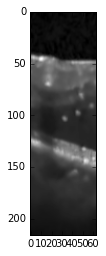

In [58]:
plt.imshow(denoisedimages[0],cmap="gray")

In [59]:
print (np.max(denoisedimages[0]))

239


In [60]:
imsave('/home/iplab/Desktop/denoised.png',denoisedimages[0])

In [61]:
for item in range(770):
    imsave('/home/iplab/Desktop/DenoisedTrain/denoised_'+str(item+1)+'.png',denoisedimages[item])